In [1]:
!git clone https://github.com/DatumLearning/Faster_RCNN_Opencv.git

Cloning into 'Faster_RCNN_Opencv'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 8
Receiving objects: 100% (18/18), 57.35 MiB | 33.71 MiB/s, done.
Resolving deltas: 100% (4/4), done.


# Importing Laibraries

In [2]:
import numpy as np
import cv2
from google.colab.patches import  cv2_imshow

# **COCO** Names Of Objects

In [3]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" ,
"truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" ,"stop sign" ,
"parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" ,"cow" ,
"elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" ,
"shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

# Pretrained Models Of Neural Networks & Model Configuration File

### 1.frozen_inference_graph.pb:

This file typically contains the trained weights and architecture of a pre-trained neural network model. In the context of Faster R-CNN, it likely represents the frozen graph of the trained model. The "frozen" part refers to the process of converting a model trained with TensorFlow into a standalone, deployable inference graph. The frozen graph includes both the model architecture and the learned weights.

### 2.mask_rcnn_inception_v2_coco_2018_01_28.pbtxt:

This file is a configuration file, often written in the Protocol Buffers (protobuf) format. It contains the model configuration details, such as the network architecture, input/output specifications, and other parameters. In this case, it specifies the configuration for the Mask R-CNN model using the Inception V2 backbone and trained on the COCO (Common Objects in Context) dataset as of January 28, 2018.


When we use these files in our code, you are essentially loading a pre-trained object detection model (Faster R-CNN with Inception V2 backbone) along with its associated configuration. This allows you to perform object detection tasks on new images using the pre-trained model without having to train it from scratch.

In [4]:
weights="/content/Faster_RCNN_Opencv/frozen_inference_graph.pb"
config="/content/Faster_RCNN_Opencv/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

# Defining The Model

**1. cv2** is the OpenCV library in Python.

**2. dnn** is the deep neural network module within OpenCV.

**3. readNetFromTensorflow** is a function provided by OpenCV for reading a neural network model from TensorFlow.

In [8]:
net=cv2.dnn.readNetFromTensorflow(weights,config)

# Importing Images

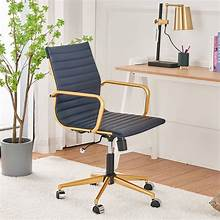

In [10]:
image=cv2.imread("/content/7.jpeg")
cv2_imshow(image)

# Shape Of Image

In [11]:
# Width , Height and RGB
height,width,_=image.shape

**1. cv2** is the OpenCV library in Python.

**2. dnn** is the deep neural network module within OpenCV.

**3. blobFromImage** is a function provided by OpenCV to preprocess an input image and convert it into a format suitable for input to a neural network.

The function takes several parameters, and here's an explanation of the parameters used in the code:

**a. image** This is the input image that you want to preprocess and convert into a blob.

**b. swapRB=True** This parameter indicates whether to swap the red and blue channels in the input image. Setting it to True means that the red and blue channels will be swapped. This is often necessary because different frameworks (including OpenCV and TensorFlow) may use different channel orders. In this case, it's set to True, suggesting that the input image is in OpenCV's default blue-green-red (BGR) format, and it needs to be swapped to red-green-blue (RGB) format commonly used in many deep learning models.

**c. crop=False** This parameter indicates whether to crop the image after resizing. Setting it to False means that the entire image will be resized without cropping.

In [12]:
blob=cv2.dnn.blobFromImage(image,swapRB=True,crop=False)

# net.setInput(blob)

  Essentially providing the neural network with the input data it needs to perform inference. This input data is in the form of the blob, which was generated from the original image and preprocessed according to the requirements of the neural network model.

 **1. net** is our pre-trained Deep learning model.

**2. setInput()** This method is used to set the input data for the neural network.

**3. blob** This is a standardized format for representing images as input to deep learning models. It encapsulates the preprocessed image data, including normalization and resizing, in a way that is suitable for the neural network.

In [13]:
net.setInput(blob)

**forward(['detection_out_final'])** This method is used to perform the forward pass, where input data is fed through the network, and the output is obtained.

 The argument **['detection_out_final']** specifies the name of the output layer from which you want to retrieve the predictions.

In [14]:
boxes = net.forward(['detection_out_final'])

In [15]:
boxes[0].shape

(1, 1, 100, 7)

In [16]:
output=boxes[0].squeeze()

In [17]:
output

array([[0.0000000e+00, 6.3000000e+01, 9.3085384e-01, 0.0000000e+00,
        4.9899668e-02, 2.8621763e-01, 8.0993688e-01],
       [0.0000000e+00, 6.1000000e+01, 9.1169405e-01, 1.9979399e-01,
        1.8443307e-01, 7.6206148e-01, 9.8106873e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0

# Extracting Cordinates, Draw Bounding Boxes & Print The Class

**for i in range(output.shape[0])** This is a loop that iterates over each detection result in the output tensor.

**confidence = output[i, 2]** Extracts the confidence score of the i-th detection result. The confidence score indicates how certain the model is about the correctness of the detection.

**if confidence > 0.7** Checks whether the confidence score is greater than 0.7. This threshold is used to filter out low-confidence detections, allowing you to consider only those detections with high confidence.

**x1n, y1n, x2n, y2n = output[i, 3:]** Extracts the bounding box coordinates of the i-th detection result. The coordinates include the x and y coordinates of the top-left corner (x1n, y1n) and the bottom-right corner (x2n, y2n) of the bounding box.

**print(x1n, y1n, x2n, y2n)** Prints the bounding box coordinates of the detected object if its confidence is above the threshold (0.7 in this case).

In [18]:
font=cv2.FONT_HERSHEY_SIMPLEX

In [19]:
#Extracting Cordinates
img=cv2.imread("/content/7.jpeg")
for i in range(output.shape[0]):
  confidence=output[i,2]
  if confidence>0.7:
    x1n,y1n,x2n,y2n=output[i,3:]
    x1=int(x1n*width)
    y1=int(y1n*height)
    x2=int(x2n*width)
    y2=int(y2n*height)

    # Draw a Bounding Box
    img=cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),3)

    #Showing Class names
    class_name=coco_names[int(output[i,1])]

    #Putting All Thing on Picture
    img=cv2.putText(img,class_name,(x1,y1-10),font,0.5, #-10 because we have to put the class on the top of the images
                   (255,0,0),1,cv2.LINE_AA )

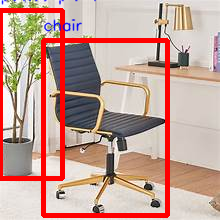

In [20]:
cv2_imshow(img)